In [700]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb; sb.set()

JoinedDataPrepared_filename = '../../SchoolData/JoinedData_Urban_High_Schools_Reduced_By_Columns_2015.csv'
data = pd.read_csv(JoinedDataPrepared_filename, header= 0)

In [701]:
dataFields = data.columns.values.tolist()
dataFields
print(dataFields)
print(len(dataFields))

['AVERAGE_DAILY_MEMBERSHIP', 'TOTAL', 'WHITE', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN', 'HAWAIIAN_PACISLD', 'WHITE_PCT', 'AFRICAN_AMERICAN_PCT', 'HISPANIC_PCT', 'ASIAN_PCT', 'NATIVE_AMERICAN_PCT', 'HAWAIIAN_PACISLD_PCT', 'LIMITED_ENGLISH_PROFICIENT_PCT', 'LIMITED_ENGLISH_PROFICIENT', 'STUDENTS_WITH_DISABILITIES', 'STUDENTS_WITH_DISABILITIES_PCT', 'ECONOMICALLY_DISADVANTAGED', 'ECONOMICALLY_DISADVANTAGED_PCT', 'EVENT_DROPOUT_PCT', 'ALL_GRAD_RATE', 'WHITE_GRAD_RATE', 'AFRICAN_AMERICAN_GRAD_RATE', 'HISPANIC_GRAD_RATE', 'ASIAN_GRAD_RATE', 'NATIVE_AMERICAN_GRAD_RATE', 'HAWAIIAN_PACISLD_GRAD_RATE', 'ECONOMICALLY_DISADVANTAGED_GRAD_RATE', 'STUDENTS_WITH_DISABILITIES_GRAD_RATE', 'LIMITED_ENGLISH_PROFICIENT_GRAD_RATE', 'ALL_GRAD_COUNT']
32


In [1049]:
dataset = data.as_matrix()
#print(dataset[1:9,[1,8,9,10,14,17,19]])
W = np.asarray(dataset[:,[
                          1, # total
                          #8, # WHITE_PCT
                          9, # AA
                          10, # Hispanic
                          # 14, # Lim Eng
                          # 17, # Disabilities
                          19, # Econ Disad 
                          21, # Grad Rate 
                         ]])
X = np.asarray(dataset[:,[
                          1, # total
                          #8, # WHITE_PCT
                          9, # AA
                          10, # Hispanic
                          # 14, # Lim Eng
                          # 17, # Disabilities
                          19, # Econ Disad 
                         ]])
y = np.asarray(dataset[:,21])
#y = np.asarray(dataset[:,31],dtype="int64")

In [1050]:
from sklearn.linear_model import LinearRegression

In [1051]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [1052]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


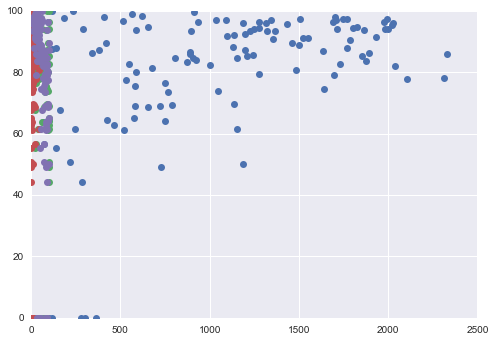

In [1053]:
plt.plot(X,y,'o')

In [1054]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [1055]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[ 0.01948976 -0.22017158 -0.96810385  0.11222338]
70.5751856602


In [1056]:
#K nearest neighbors (kNN)
from sklearn import neighbors
# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
y = np.asarray(dataset[:,31],dtype="int64")
knn.fit(X, y)

# call the "predict" method:
result = knn.predict([X[5]])
print(result)
print(y[5])

[1222]
1340


In [1057]:
y_Predict = []
for i in range(len(X)):
    result = knn.predict([X[i]])
    y_Predict.append(result)
    print(str(result) + ' ' + str(y[i]))

[728] 767
[773] 824
[0] 0
[0] 0
[0] 0
[1222] 1340
[1199] 1199
[355] 550
[0] 42
[355] 566
[1340] 1432
[0] 0
[1634] 1634
[1571] 1636
[0] 40
[706] 976
[1634] 1804
[76] 177
[1028] 1043
[439] 609
[0] 0
[768] 911
[550] 450
[376] 470
[376] 550
[547] 683
[496] 573
[0] 294
[0] 108
[728] 776
[728] 728
[1199] 1304
[1064] 1064
[376] 439
[728] 769
[0] 76
[1064] 1148
[0] 0
[1230] 1230
[706] 995
[995] 1005
[1230] 1278
[728] 836
[1043] 1109
[0] 0
[1064] 1171
[1636] 1764
[1764] 1904
[439] 559
[1613] 1670
[773] 1057
[976] 1137
[773] 1004
[1064] 1203
[1203] 1262
[1230] 1300
[1304] 1461
[0] 103
[1432] 1558
[1558] 1721
[1867] 1867
[1571] 1747
[1613] 1652
[1558] 1616
[1867] 1928
[0] 376
[376] 376
[0] 333
[595] 595
[355] 482
[0] 274
[316] 410
[355] 496
[595] 791
[0] 88
[355] 547
[110] 152
[316] 455
[110] 126
[355] 355
[291] 316
[274] 291
[1571] 1579
[1016] 1016
[376] 402
[1222] 1419
[595] 1028
[773] 773
[110] 110
[1634] 1669
[110] 236
[706] 706
[1634] 1999
[0] 0
[0] 272
[1222] 1222
[1669] 1880
[0] 117
[1571]

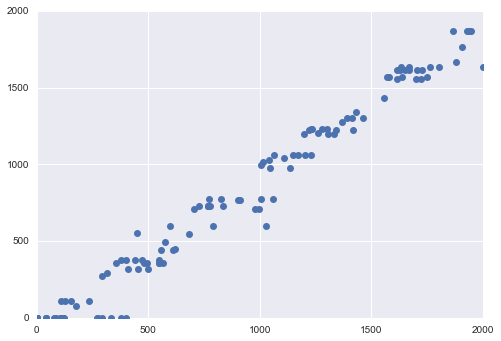

In [1058]:
plt.plot(y,y_Predict,'o')

In [1059]:
from sklearn.svm import SVC
model = SVC()
print(model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [1060]:
# fit the model on our data
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1061]:
y_Predicted = model.predict(X)

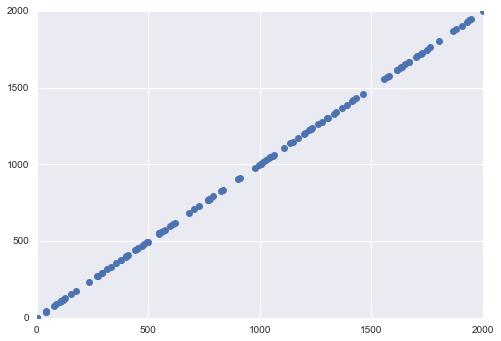

In [1062]:
plt.plot(y,y_Predicted,'o')

Reduced dataset shape: (120, 2)


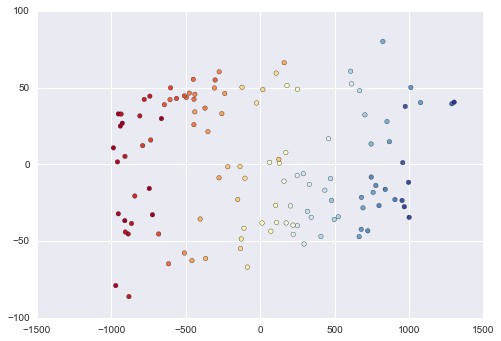

In [1063]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# pca.fit(X)
# X_reduced = pca.transform(X)
pca.fit(W)
W_reduced = pca.transform(W)
print("Reduced dataset shape:", W_reduced.shape)

import pylab as pl
pl.scatter(W_reduced[:, 0], W_reduced[:, 1], c=y,
           cmap='RdYlBu')



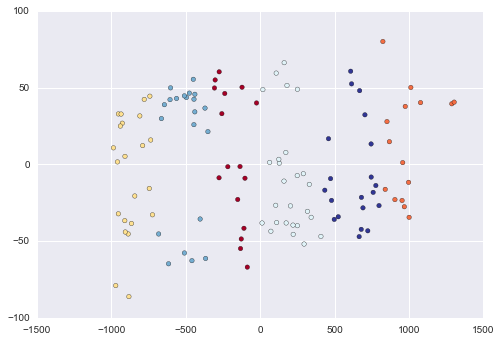

In [1064]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=6, random_state=0) # Fixing the RNG in kmeans
k_means.fit(W)
y_pred = k_means.predict(W)

pl.scatter(W_reduced[:, 0], W_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

##### from sklearn.manifold import Isomap

In [1065]:
iso = Isomap(n_components=4)
data_projected = iso.fit_transform(X)

In [1066]:
data_projected.shape

(120, 4)

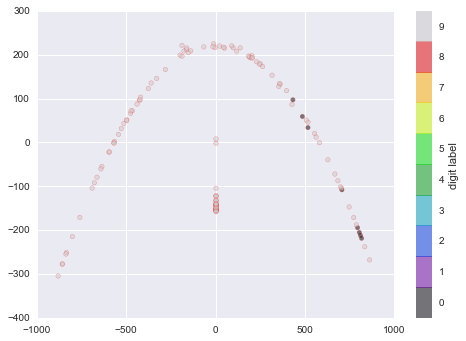

In [1067]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=y,
            edgecolor='red', alpha=.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [1068]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

(90, 4) (30, 4)


In [1069]:
from sklearn.svm import SVR
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(penalty='l2')
clf = SVR()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [1070]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

ValueError: Can't handle mix of multiclass and continuous

In [1071]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

ValueError: Can't handle mix of multiclass and continuous

In [1072]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0)
#visualize_tree(clf, X, y, boundaries=False);

In [1073]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.components_)

[ 0.99567522  0.00372022]
[[ 0.99962316 -0.02085398  0.00312297 -0.01757569]
 [ 0.02707882  0.81919257  0.02393634  0.57237865]]


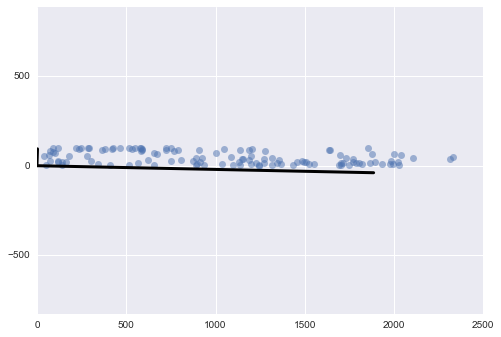

In [1074]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [1075]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(120, 4)
(120, 1)


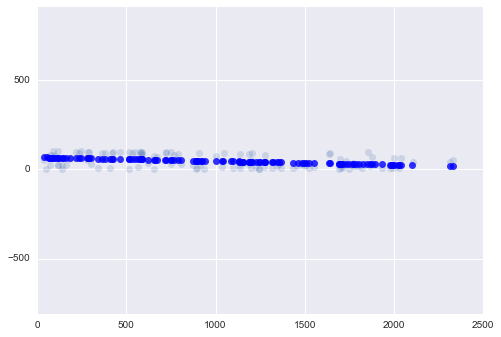

In [1076]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

In [1077]:
pca = PCA(0.95)  
Wproj = pca.fit_transform(W)
print(W.shape)
print(Wproj.shape)

(120, 5)
(120, 1)


In [1078]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar();

IndexError: index 1 is out of bounds for axis 1 with size 1

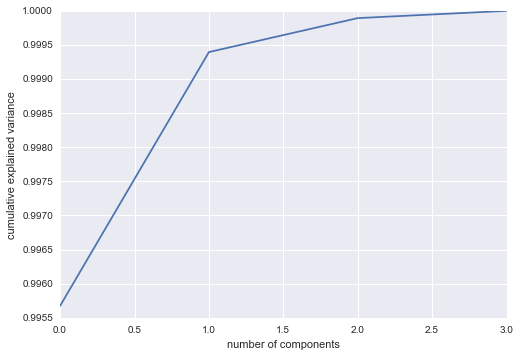

In [1079]:
sb.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

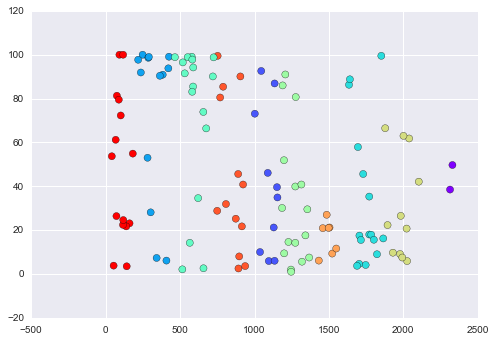

In [1080]:
from sklearn.cluster import KMeans
est = KMeans(10)  # 3 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

In [1081]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(X)
est.cluster_centers_.shape

(10, 4)

In [1082]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

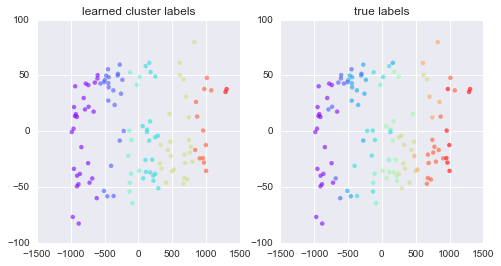

In [1083]:
from sklearn.decomposition import PCA

X_new = PCA(2).fit_transform(X)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X_new[:, 0], X_new[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X_new[:, 0], X_new[:, 1], c=y, **kwargs)
ax[1].set_title('true labels');

In [1084]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.13333333333333333

[[8 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


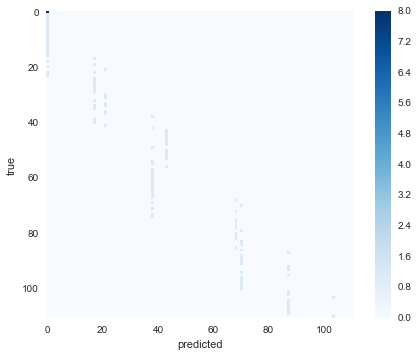

In [1085]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, labels))

plt.imshow(confusion_matrix(y, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [1086]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [1087]:
y_pred = knn.predict(X)

In [1088]:
print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

61 / 120 correct


In [1089]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((90, 4), (30, 4))

In [1090]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

2 / 30 correct


In [1091]:
knn.score(X_test, y_test)

0.066666666666666666

In [1092]:
for n_neighbors in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print(n_neighbors, knn.score(X_test, y_test))

1 0.0333333333333
5 0.0666666666667
10 0.0666666666667
20 0.0666666666667
30 0.0666666666667


In [1093]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
X1.shape, X2.shape

((60, 4), (60, 4))

In [1094]:
print(KNeighborsClassifier(1).fit(X2, y2).score(X1, y1))
print(KNeighborsClassifier(1).fit(X1, y1).score(X2, y2))

0.0166666666667
0.0


In [1095]:
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
cv.mean()

/Users/glennacree/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

In [1096]:
cross_val_score(KNeighborsClassifier(1), X, y, cv=10)

/Users/glennacree/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.